In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
Average Degree (K) = exp(ln(Number of Nodes(N))/Average Path Length(L))
"""

def optimize_beta(N, target_average_path_length):
    # Initialize β with an initial value
    beta = 0.2
    # Set the learning rate (step size)
    learning_rate = 0.5
    # Set the convergence threshold
    convergence_threshold = 0.25
    # Average degree
    K = int(np.ceil(np.exp(np.log(N)/target_average_path_length)))
    graph = nx.watts_strogatz_graph(N, K, beta)

    # Calculate the initial average path length
    initial_average_path_length = nx.average_shortest_path_length(graph)

    # Optimization loop
    iteration = 0
    while abs(initial_average_path_length - target_average_path_length) > convergence_threshold:
        iteration += 1

        # Calculate the gradient
        num_nodes = len(graph.nodes)
        gradient = 2 * (initial_average_path_length -target_average_path_length) / (num_nodes * (num_nodes - 1))

        # Update β using the gradient ascent update rule
        beta += learning_rate * gradient

        # Generate a new Watts-Strogatz graph using the updated β
        graph = nx.watts_strogatz_graph(N, K, beta)

        # Calculate the new average path length
        new_average_path_length = nx.average_shortest_path_length(graph)

        # Check for convergence
        if abs(new_average_path_length - target_average_path_length) < convergence_threshold:
            break
        if (beta > 1):
            beta = 1
            break
        if (beta < 0):
            beta = 0
            break
        # Print the current iteration and β value
        print(
            f"Iteration: {iteration}, β: {beta}, Average Path Length: {new_average_path_length}")
    return beta, K, new_average_path_length

In [3]:
def generate_graph(N,K,beta):
    return nx.watts_strogatz_graph(N,K,beta)

In [4]:
def draw_graph(graph,N,new_average_path_length):
    # Draw the graph
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos=pos, node_size=200, alpha=0.8, node_color='orange')
    # Label the nodes with their IDs
    labels = {node: str(node) for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos=pos, font_size=6)
    plt.axis('off')
    plt.title('Random Graph with %d Nodes and Average Path Length of %f' %(N, new_average_path_length))
    plt.show()

In [5]:
# Define the desired average path length
target_average_path_length = 2.3
# Generate the initial Watts-Strogatz graph
N = 100  # Number of nodes
optimal_beta, K, new_average_path_length = optimize_beta(N, target_average_path_length)
print("\nOptimization Complete!")
print(f"Final β: {optimal_beta}")
print(f"Final Average Path Length: {new_average_path_length}")

Iteration: 1, β: 0.20003958779716358, Average Path Length: 2.762828282828283
Iteration: 2, β: 0.20007917559432714, Average Path Length: 2.7426262626262625
Iteration: 3, β: 0.2001187633914907, Average Path Length: 2.781010101010101
Iteration: 4, β: 0.20015835118865427, Average Path Length: 2.904848484848485
Iteration: 5, β: 0.20019793898581784, Average Path Length: 2.78020202020202
Iteration: 6, β: 0.2002375267829814, Average Path Length: 2.7044444444444444
Iteration: 7, β: 0.20027711458014497, Average Path Length: 2.6791919191919193
Iteration: 8, β: 0.20031670237730853, Average Path Length: 2.672727272727273
Iteration: 9, β: 0.2003562901744721, Average Path Length: 2.714141414141414
Iteration: 10, β: 0.20039587797163566, Average Path Length: 2.70020202020202
Iteration: 11, β: 0.20043546576879923, Average Path Length: 2.706868686868687
Iteration: 12, β: 0.2004750535659628, Average Path Length: 2.7117171717171717
Iteration: 13, β: 0.20051464136312636, Average Path Length: 2.7002020202020

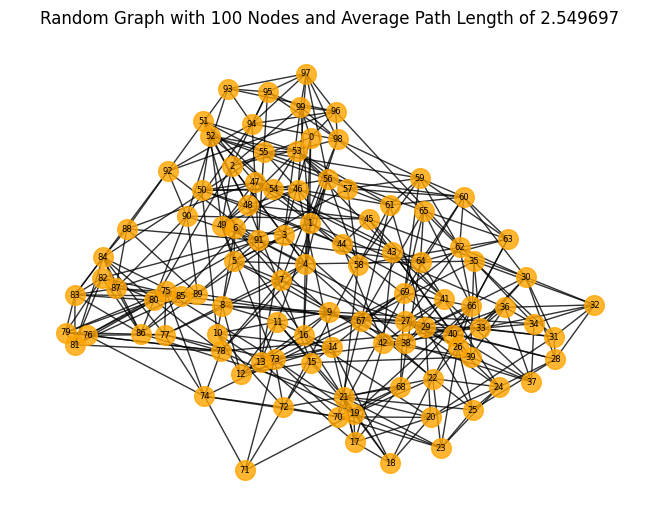

In [6]:
graph = generate_graph(N,K,optimal_beta)
draw_graph(graph,N,new_average_path_length)
